In [1]:
import sqlalchemy
from sqlalchemy import create_engine, inspect, text
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "password"
SQL_IP = "localhost"
PORT = '5432'
DATABASE = "crowdfunding_db"

In [3]:
# create engine
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string) 

In [4]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

contact_info
contact_id INTEGER
first_name VARCHAR(100)
last_name VARCHAR(100)
email VARCHAR(100)
last_updated TIMESTAMP

campaign
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(50)
description VARCHAR
goal DOUBLE_PRECISION
pledged DOUBLE_PRECISION
outcome VARCHAR(10)
backers_count INTEGER
country VARCHAR(5)
currency VARCHAR(5)
launch_date DATE
end_date DATE
staff_pick BOOLEAN
spotlight BOOLEAN
category_id VARCHAR(5)
subcategory_id VARCHAR(10)
last_updated TIMESTAMP

categories
category_id VARCHAR(5)
category VARCHAR(20)
last_updated TIMESTAMP

subcategories
subcategory_id VARCHAR(10)
subcategory VARCHAR(20)
last_updated TIMESTAMP



In [5]:
# LOAD DATA
filepath = "../Resources (CSV Files)/Team_3_contacts.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("contact_info", schema="public", con=engine, if_exists="append", method="multi", index=False)

(1000, 4)


1000

In [6]:
# LOAD DATA
filepath = "../Resources (CSV Files)/Team_3_category.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("categories", schema="public", con=engine, if_exists="append", method="multi", index=False)

(9, 2)


9

In [7]:
# LOAD DATA
filepath = "../Resources (CSV Files)/Team_3_subcategory.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("subcategories", schema="public", con=engine, if_exists="append", method="multi", index=False)

(24, 2)


24

In [8]:
# LOAD DATA
filepath = "../Resources (CSV Files)/Team_3_campaign.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("campaign", schema="public", con=engine, if_exists="append", method="multi", index=False)

(1000, 16)


1000

In [9]:
query = """
        SELECT
            *
        FROM
            campaign
        ORDER BY 
            goal DESC
        LIMIT 10;
        """

df = pd.read_sql(text(query), con=engine)
df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category_id,subcategory_id,last_updated
0,1905,2329,Romero-Hoffman,Open-source zero administration complexity,199200.0,184750.0,failed,2253,CA,CAD,2021-06-15,2021-10-26,False,False,4,subcat4,2024-01-07 17:46:46.143645
1,553,4593,Hensley Ltd,Versatile cohesive open system,199000.0,142823.0,failed,3483,US,USD,2021-07-27,2021-11-21,False,False,1,subcat1,2024-01-07 17:46:46.143645
2,2489,2272,Miller Ltd,Open-architected mobile emulation,198600.0,97037.0,failed,1198,US,USD,2020-11-10,2021-10-30,False,False,6,subcat10,2024-01-07 17:46:46.143645
3,2311,1673,Farrell and Sons,Synergized 4thgeneration conglomeration,198500.0,123040.0,failed,1482,AU,AUD,2020-08-23,2021-03-24,False,True,2,subcat2,2024-01-07 17:46:46.143645
4,2837,3768,Kelly-Colon,Stand-alone grid-enabled leverage,197900.0,110689.0,failed,4428,AU,AUD,2021-09-18,2021-11-30,False,False,4,subcat4,2024-01-07 17:46:46.143645


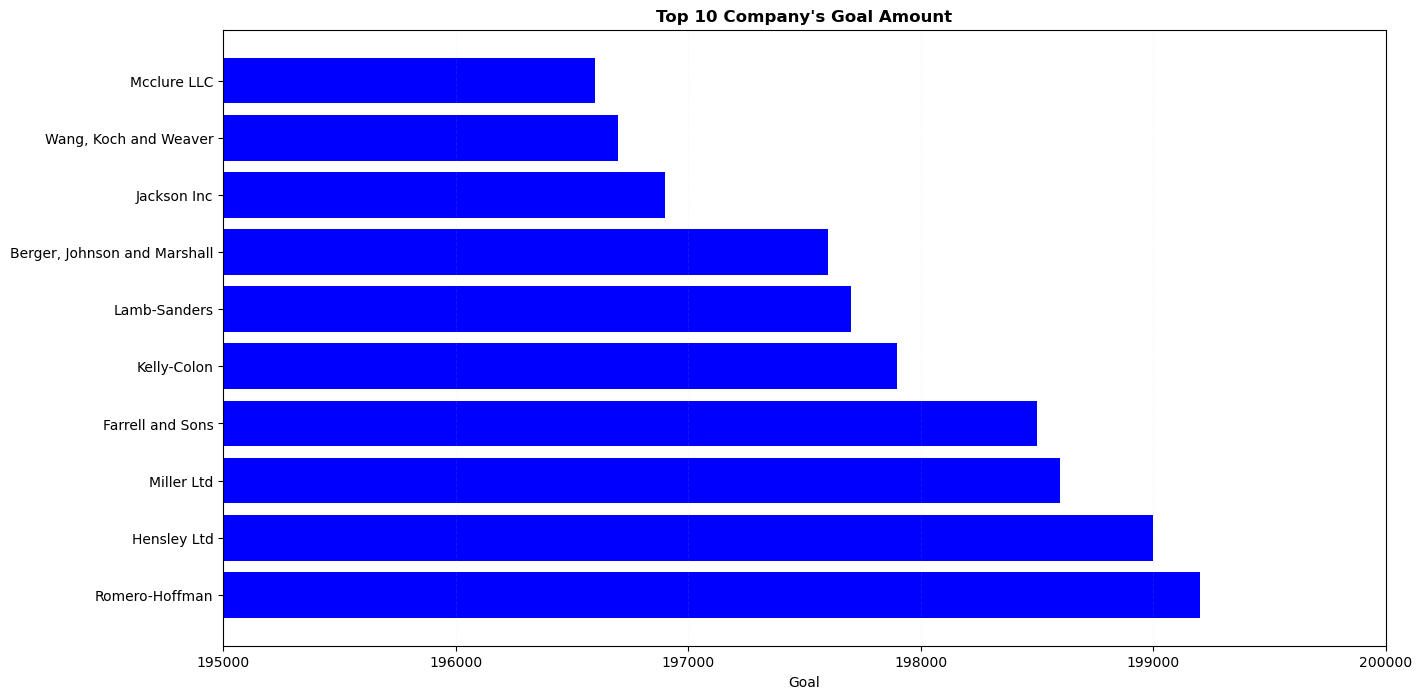

In [10]:
plt.figure(figsize=(15,8))
plt.barh(df.company_name, df.goal, color="blue")
plt.title("Top 10 Company's Goal Amount", fontweight="bold")
plt.xlabel("Goal")
plt.xlim(195000, 200000)
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.10)

plt.show()